## Import Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("winequality-red.csv", sep=";")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
data.duplicated().sum() #Checking for duplicated rows


240

In [4]:
data["quality"].value_counts()
data.drop_duplicates(inplace = True)#Remove any duplicates

We'll set 3-5 as low quality and 6-8 high quality

In [5]:
data["high_quality"] = np.where(data["quality"] > 5.5, 1, 0)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,high_quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [6]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, :11].to_numpy()
y = data.iloc[:, -1].to_numpy()

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=12)

## Build Model

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

model = SVC()
params = {"C": np.linspace(0.05, 1.5, 30),
            "kernel": ['linear', 'poly', 'rbf', 'sigmoid'], 
            "degree": range(1, 11)}

# search = GridSearchCV(model, params)
# search.fit(X_train, y_train)

## Plots

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

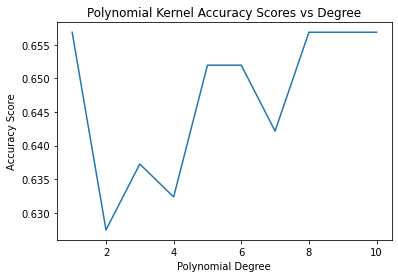

In [9]:
acc = []

for d in params["degree"]:
    y_pred = SVC(kernel="poly", degree=d).fit(X_train, y_train).predict(X_val)
    
    acc.append(accuracy_score(y_val, y_pred))

plt.plot(params["degree"], acc)
plt.xlabel("Polynomial Degree")
plt.ylabel("Accuracy Score")
plt.title("Polynomial Kernel Accuracy Scores vs Degree")
plt.show()

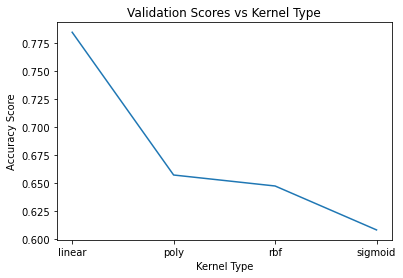

In [10]:
acc = []

for kernel in params["kernel"]:
    y_pred = SVC(kernel=kernel, degree=1).fit(X_train, y_train).predict(X_val)
    
    acc.append(accuracy_score(y_val, y_pred))

plt.plot(params["kernel"], acc)
plt.xlabel("Kernel Type")
plt.ylabel("Accuracy Score")
plt.title("Validation Scores vs Kernel Type")
plt.show()

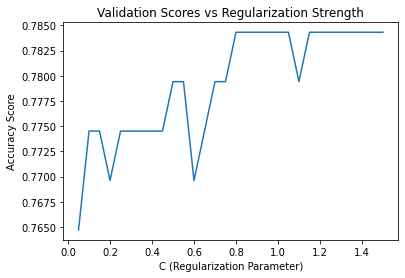

In [11]:
acc = []

for c in params["C"]:
    y_pred = SVC(C=c, kernel="linear").fit(X_train, y_train).predict(X_val)
    
    acc.append(accuracy_score(y_val, y_pred))

plt.plot(params["C"], acc)
plt.xlabel("C (Regularization Parameter)")
plt.ylabel("Accuracy Score")
plt.title("Validation Scores vs Regularization Strength")
plt.show()

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

model = SVC(C=1, kernel="linear")
model.fit(X_train_val, y_train_val)
y_pred = model.predict(X_test)

model.score(X_test, y_test)

0.7382352941176471

<AxesSubplot:>

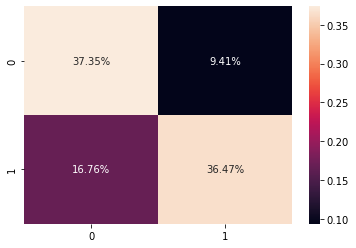

In [18]:
cfm = confusion_matrix(y_test, y_pred)

sns.heatmap(cfm/np.sum(cfm), annot=True, fmt=".2%")